# Warmup Question 1

From *HealthCare Fraud Detection Capstone Project Proposal.ipynb*

**Summary:**

EDA for beneficiary and physician data

In [3]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

## Get the data

In [5]:
beneficiary = pd.read_csv('data/archive/Train_Beneficiarydata-1542865627584.csv')
print(beneficiary.shape)
beneficiary.head(2)

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [6]:
inpatient = pd.read_csv('data/archive/Train_Inpatientdata-1542865627584.csv')
print(inpatient.shape)
inpatient.head(2) 

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [7]:
outpatient = pd.read_csv('data/archive/Train_Outpatientdata-1542865627584.csv')
print(outpatient.shape)
outpatient.head(2)

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [8]:
labels = pd.read_csv('data/archive/Train-1542865627584.csv')
print(labels.shape)
labels.head(2)

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


## beneficiary data

In [10]:
beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [11]:
# missing data
beneficiary.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

## outpatient data

In [13]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [14]:
# missing data
outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

## inpatient data

In [16]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [17]:
# missing data
inpatient.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

## provider data

In [19]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [20]:
# missing data
labels.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

### Warmup Question 1:
- How many medical doctors are there in the train outpatient dataset?
- How many medical doctors are there in the train inpatient dataset? 
Do they match with those from the outpatient record?
- Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical
outpatient patients, or do those who have more visits to the providers have worse health conditions?
Provide an analysis on these issues.
- How many distinct patients (**BeneIDs**) are there in the in/out-patient datasets? 
- Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to
characterize those doctors who move around among different providers?
- Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize
those patients who receive services from a lot of different hospitals?
- Do the same providers provide both inpatient and outpatient services? Summarize your finding.
- Do Some of the same patients receive both inpatient and outpatient services?  Summarize your finding.

In [22]:
outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


# How many medical doctors are there in the train inpatient and train outpatient datasets? 

set() counts NaN as one unique value, so 'NaN's are counted as one unique phsyician group...

In [24]:
print('number of medical doctors in the train outpatient dataset:', len(set(outpatient['OtherPhysician']) | set(outpatient['AttendingPhysician']) | set(outpatient['OperatingPhysician'])))

number of medical doctors in the train outpatient dataset: 89771


In [25]:
print('number of medical doctors in the train inpatient dataset:', len(set(inpatient['OtherPhysician']) | set(inpatient['AttendingPhysician']) | set(inpatient['OperatingPhysician'])))

number of medical doctors in the train inpatient dataset: 18257


# Do they match with each other? 

No. There are more physicians treating outpatients than treating inpatients.

# Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

Compare incidence of chronic conditions between inpatient and outpatient datasets. Chronic condition data is in the beneficiary dataset. Chronic values seem to be binary, but which one (1 or 2) represents whether the condition is present or not? Or are we looking at the incidence of ClmDiagnosis codes? 

In [28]:
beneficiary.nunique()

BeneID                             138556
DOB                                   900
DOD                                    11
Gender                                  2
Race                                    4
RenalDiseaseIndicator                   2
State                                  52
County                                314
NoOfMonths_PartACov                    13
NoOfMonths_PartBCov                    13
ChronicCond_Alzheimer                   2
ChronicCond_Heartfailure                2
ChronicCond_KidneyDisease               2
ChronicCond_Cancer                      2
ChronicCond_ObstrPulmonary              2
ChronicCond_Depression                  2
ChronicCond_Diabetes                    2
ChronicCond_IschemicHeart               2
ChronicCond_Osteoporasis                2
ChronicCond_rheumatoidarthritis         2
ChronicCond_stroke                      2
IPAnnualReimbursementAmt             3004
IPAnnualDeductibleAmt                 147
OPAnnualReimbursementAmt          

In [29]:
beneficiary

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [30]:
# create a list of chronic conidition columns 
chronic_cols = [col for col in beneficiary.columns if 'ChronicCond_' in col]
chronic_cols

['ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']

In [31]:
beneficiary['chronic_counts_1'] = (beneficiary[chronic_cols] == 1).sum(axis=1)
beneficiary['chronic_counts_2'] = (beneficiary[chronic_cols] == 2).sum(axis=1)
beneficiary.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,chronic_counts_1,chronic_counts_2
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,2,1,1,36000,3204,60,70,7,4
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,0,0,30,50,0,11
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,1,2,2,2,0,0,90,40,2,9
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,1,1,1,2,0,0,1810,760,6,5
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,2,2,2,0,0,1790,1200,2,9


In [32]:
bene_chronic_counts = beneficiary[['BeneID', 'chronic_counts_1', 'chronic_counts_2']]
bene_chronic_counts

,BeneID,chronic_counts_1,chronic_counts_2
0,BENE11001,7,4
1,BENE11002,0,11
2,BENE11003,2,9
3,BENE11004,6,5
4,BENE11005,2,9
...,...,...,...
138551,BENE159194,1,10
138552,BENE159195,2,9
138553,BENE159196,6,5
138554,BENE159197,3,8


In [33]:
inpatient_chronic_counts = inpatient.merge(bene_chronic_counts, how='inner', on='BeneID')

In [34]:
icc = inpatient_chronic_counts[['BeneID', 'chronic_counts_1', 'chronic_counts_2']].copy()

In [35]:
# tally the number of times a beneficiary appears in the dataframe
icc.loc[:, 'numbers_claims_filed'] = icc.groupby('BeneID')['BeneID'].transform('count')
icc.head(5)

,BeneID,chronic_counts_1,chronic_counts_2,numbers_claims_filed
0,BENE11001,7,4,3
1,BENE11001,7,4,3
2,BENE11001,7,4,3
3,BENE11011,6,5,1
4,BENE11014,5,6,1


In [36]:
outpatient_chronic_counts = outpatient.merge(bene_chronic_counts, how='inner', on='BeneID')
occ = outpatient_chronic_counts[['BeneID', 'chronic_counts_1', 'chronic_counts_2']].copy()

In [37]:
# tally the number of times a beneficiary appears in the dataframe
occ.loc[:, 'numbers_claims_filed'] = occ.groupby('BeneID')['BeneID'].transform('count')
occ.head(5)

,BeneID,chronic_counts_1,chronic_counts_2,numbers_claims_filed
0,BENE11002,0,11,1
1,BENE11003,2,9,2
2,BENE11003,2,9,2
3,BENE11004,6,5,12
4,BENE11004,6,5,12


In [38]:
# drop duplicates
icc = icc.drop_duplicates(subset=['BeneID'])
occ = occ.drop_duplicates(subset=['BeneID'])

In [39]:
print('Inpatient Summary:')
icc.describe()

Inpatient Summary:


,chronic_counts_1,chronic_counts_2,numbers_claims_filed
count,31289.000000,31289.000000,31289.000000
mean,5.205344,5.794656,1.293554
std,2.154402,2.154402,0.628794
min,0.000000,0.000000,1.000000
25%,4.000000,4.000000,1.000000
50%,5.000000,6.000000,1.000000
75%,7.000000,7.000000,1.000000
max,11.000000,11.000000,8.000000


In [40]:
print('Outpatient Summary:')
occ.describe()

Outpatient Summary:


,chronic_counts_1,chronic_counts_2,numbers_claims_filed
count,133980.000000,133980.000000,133980.000000
mean,3.726086,7.273914,3.864286
std,2.352545,2.352545,3.092396
min,0.000000,0.000000,1.000000
25%,2.000000,6.000000,1.000000
50%,4.000000,7.000000,3.000000
75%,5.000000,9.000000,5.000000
max,11.000000,11.000000,29.000000


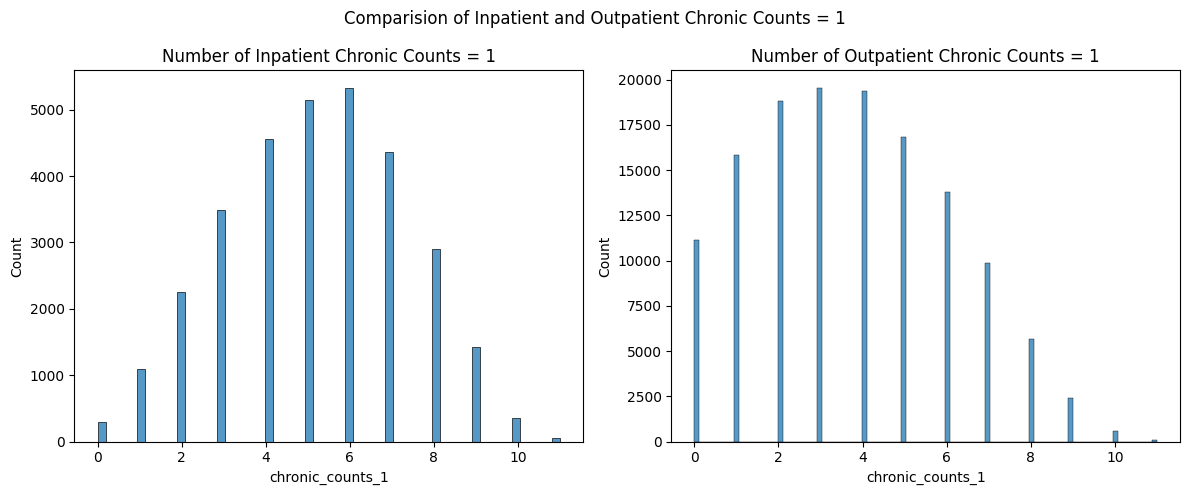

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(icc['chronic_counts_1'], ax=axes[0])
axes[0].set_title('Number of Inpatient Chronic Counts = 1')

sns.histplot(occ['chronic_counts_1'], ax=axes[1])
axes[1].set_title('Number of Outpatient Chronic Counts = 1')

plt.suptitle('Comparision of Inpatient and Outpatient Chronic Counts = 1')
plt.tight_layout() 
plt.show()

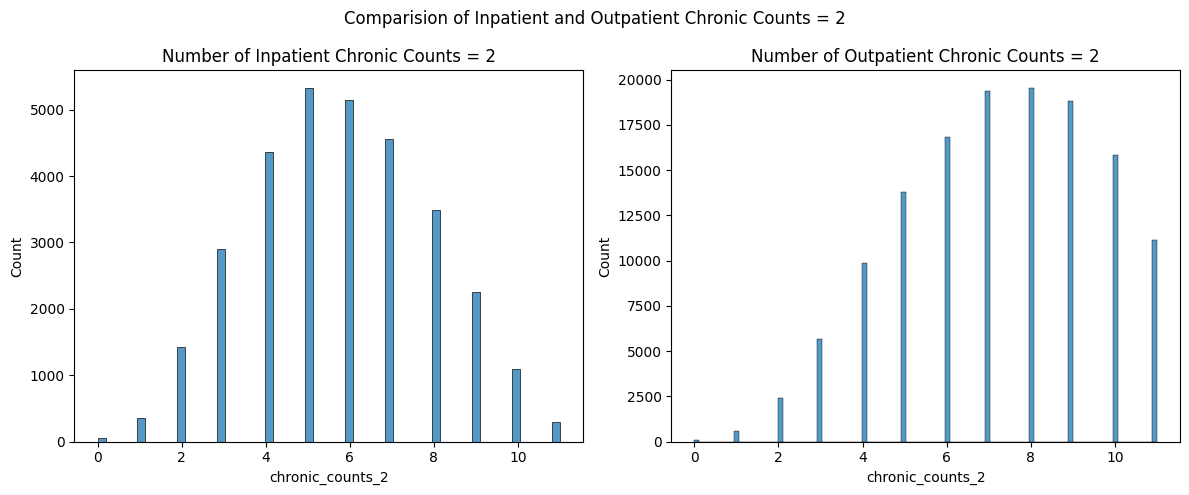

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(icc['chronic_counts_2'], ax=axes[0])
axes[0].set_title('Number of Inpatient Chronic Counts = 2')

sns.histplot(occ['chronic_counts_2'], ax=axes[1])
axes[1].set_title('Number of Outpatient Chronic Counts = 2')

plt.suptitle('Comparision of Inpatient and Outpatient Chronic Counts = 2')
plt.tight_layout() 
plt.show()

In [43]:
print('skew for inpatient chronic counts = 1:', icc['chronic_counts_1'].skew(axis=0, skipna=True))
print('skew for outpatient chronic counts = 1:', occ['chronic_counts_1'].skew(axis=0, skipna=True))      

skew for inpatient chronic counts = 1: -0.07478759881981412
skew for outpatient chronic counts = 1: 0.28861761102425537


chronic counts = 2 is just a mirror of all this data (as it should be). 

Depending on how 1 and 2 are defined (y/n or n/y):
- most inpatients have at least 6 or 5 chronic conditions
- most outpatients have at least 3 or 8 chronic conditions

Outpatient distribution of chronic conditions is a little more skewed (but not badly). 

How many claims do beneficiaries file?  

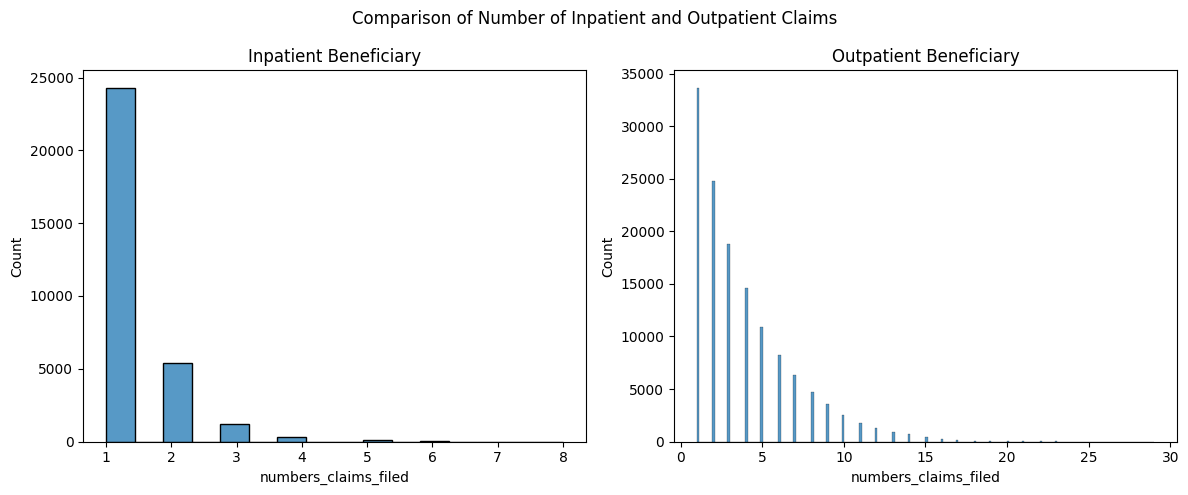

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(icc['numbers_claims_filed'], ax=axes[0])
axes[0].set_title('Inpatient Beneficiary')

sns.histplot(occ['numbers_claims_filed'], ax=axes[1])
axes[1].set_title('Outpatient Beneficiary')

plt.suptitle('Comparison of Number of Inpatient and Outpatient Claims')
plt.tight_layout() 
plt.show()

On average, inpatients file 1.3 claims and outpatients file 3.9 claims.

# How many distinct patients (BeneIDs) are there in the in/out-patient datasets?

In [49]:
print('number of unique inpatients:', inpatient['BeneID'].nunique())
print('number of unique outpatients:', outpatient['BeneID'].nunique())

number of unique inpatients: 31289
number of unique outpatients: 133980


# Do doctors serve for different providers? Study the distribution of hospital counts/doctor. Is it possible to characterize those doctors who move around among different providers?

In [51]:
outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [52]:
outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [53]:
print('number of unique outpatient providers:', outpatient['Provider'].nunique())
print('number of unique inpatient providers:', inpatient['Provider'].nunique())

number of unique outpatient providers: 5012
number of unique inpatient providers: 2092


### Attending physicians

In [55]:
# count number of unique providers per attending physician for outpatient services
attending_provider_counts_o = outpatient.groupby('AttendingPhysician')['Provider'].nunique().reset_index()
attending_provider_counts_o.rename({'Provider':'provider_associations'}, axis='columns', inplace=True)
attending_provider_counts_o.head()

,AttendingPhysician,provider_associations
0,PHY311001,1
1,PHY311004,1
2,PHY311005,1
3,PHY311006,1
4,PHY311008,2


In [56]:
# count number of unique providers per attending physician for inpatient services
attending_provider_counts_i = inpatient.groupby('AttendingPhysician')['Provider'].nunique().reset_index()
attending_provider_counts_i.rename({'Provider':'provider_associations'}, axis='columns', inplace=True)
attending_provider_counts_i.head()

,AttendingPhysician,provider_associations
0,PHY311002,1
1,PHY311023,1
2,PHY311028,1
3,PHY311035,1
4,PHY311056,1


In [57]:
print(f'total number of unique outpatient attending physicians: {len(attending_provider_counts_o)}')
print('summary of number of providers associated with attending outpatient physicians:', attending_provider_counts_o['provider_associations'].describe())

total number of unique outpatient attending physicians: 74109
summary of number of providers associated with attending outpatient physicians: count    74109.000000
mean         1.069681
std          0.293186
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: provider_associations, dtype: float64


In [58]:
print(f'total number of unique inpatient attending physicians: {len(attending_provider_counts_i)}')
print('summary of number of providers associated with attending inpatient physicians:', attending_provider_counts_i['provider_associations'].describe())

total number of unique inpatient attending physicians: 11604
summary of number of providers associated with attending inpatient physicians: count    11604.000000
mean         1.017235
std          0.133423
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: provider_associations, dtype: float64


**Note:** 

On average, outpatient and inpatient attending physicians are associated with 1 provider. At the extreme, there are attending OUTPATIENT physicians who are associated with as many as 8 different providers and attending INPATIENT physicians who are associated with as many as 3 different providers.

### Operating physicians 

In [61]:
# count unique number of providers per operating physician - outpatient
operating_provider_counts_o = outpatient.groupby('OperatingPhysician')['Provider'].nunique().reset_index()
operating_provider_counts_o.columns = ['OperatingPhysician', 'provider_associations']
operating_provider_counts_o = operating_provider_counts_o.sort_values('provider_associations', ascending=False)
print(f'total number of unique outpatient operating physicians: {len(operating_provider_counts_o)}')
print(operating_provider_counts_o['provider_associations'].describe())

# count unique number of providers per operating physician - inpatient
operating_provider_counts_i = inpatient.groupby('OperatingPhysician')['Provider'].nunique().reset_index()
operating_provider_counts_i.columns = ['OperatingPhysician', 'provider_associations']
operating_provider_counts_i = operating_provider_counts_i.sort_values('provider_associations', ascending=False)
print(f'total number of unique inpatient operating physicians: {len(operating_provider_counts_i)}')
print(operating_provider_counts_i['provider_associations'].describe())

total number of unique outpatient operating physicians: 28532
count    28532.000000
mean         1.036240
std          0.208182
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: provider_associations, dtype: float64
total number of unique inpatient operating physicians: 8287
count    8287.000000
mean        1.011946
std         0.108651
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: provider_associations, dtype: float64


**Note:**

On average, outpatient and inpatient operating physicians are associated with 1 provider. At the extreme, there are operating OUTPATIENT physicians who are associated with as many as 6 different providers and operating INPATIENT physicians who are associated with as many as 2 different providers.

### Other physicians

In [64]:
# count unique number of providers per other physician - outpatient
other_provider_counts_o = outpatient.groupby('OtherPhysician')['Provider'].nunique().reset_index()
other_provider_counts_o.columns = ['OtherPhysician', 'provider_associations']
other_provider_counts_o = other_provider_counts_o.sort_values('provider_associations', ascending=False)
print(f'total number of unique outpatient other physicians: {len(other_provider_counts_o)}')
print(other_provider_counts_o['provider_associations'].describe())

# count unique number of providers per other physician - inpatient
other_provider_counts_i = inpatient.groupby('OtherPhysician')['Provider'].nunique().reset_index()
other_provider_counts_i.columns = ['OtherPhysician', 'provider_associations']
other_provider_counts_i = other_provider_counts_i.sort_values('provider_associations', ascending=False)
print(f'total number of unique inpatient other physicians: {len(other_provider_counts_i)}')
other_provider_counts_i['provider_associations'].describe()

total number of unique outpatient other physicians: 44388
count    44388.000000
mean         1.047378
std          0.239091
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: provider_associations, dtype: float64
total number of unique inpatient other physicians: 2877


count    2877.000000
mean        1.006952
std         0.087185
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: provider_associations, dtype: float64

**Note:**

On average, outpatient and inpatient other physicians are associated with 1 provider. At the extreme, there are other OUTPATIENT physicians who are associated with as many as 7 different providers and other INPATIENT physicians who are associated with as many as 3 different providers.

### Overall

Most inpatient and outpatient physicians work with 1 provider. There are more extreme cases of outpatient doctors associated with high numbers of providers. **Doctors who move around among different providers are generally outpatient physicians.**

# Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

- look at how many distinct providers are associated with each beneficiary.

In [68]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [69]:
inpatient_provider_counts = inpatient.groupby('BeneID')[['Provider']].count().reset_index()
inpatient_provider_counts.rename({'Provider':'provider_counts'}, axis=1, inplace=True)
inpatient_provider_counts

,BeneID,provider_counts
0,BENE100002,1
1,BENE100004,1
2,BENE100006,1
3,BENE100007,1
4,BENE100010,2
...,...,...
31284,BENE99965,1
31285,BENE99974,1
31286,BENE99976,1
31287,BENE99984,1


In [70]:
outpatient_provider_counts = outpatient.groupby('BeneID')[['Provider']].count().reset_index()
outpatient_provider_counts.rename({'Provider':'provider_counts'}, axis=1, inplace=True)
outpatient_provider_counts

,BeneID,provider_counts
0,BENE100000,2
1,BENE100001,10
2,BENE100002,13
3,BENE100003,1
4,BENE100004,5
...,...,...
133975,BENE99994,7
133976,BENE99995,1
133977,BENE99997,7
133978,BENE99998,3


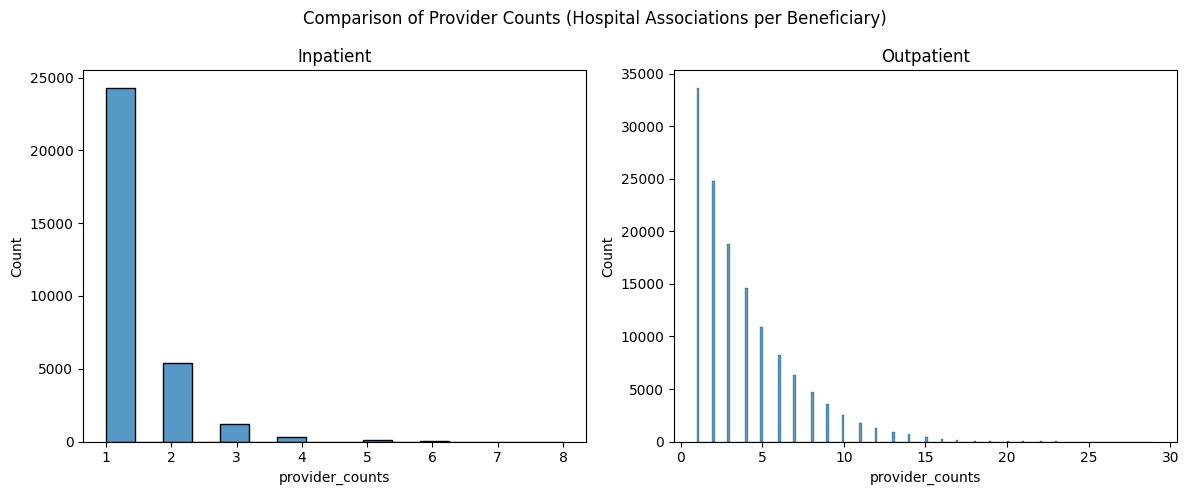

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient_provider_counts['provider_counts'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient_provider_counts['provider_counts'], ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Comparison of Provider Counts (Hospital Associations per Beneficiary)')
plt.tight_layout() 
plt.show()

In [72]:
print('INPATIENT:')
print(inpatient_provider_counts['provider_counts'].value_counts())
print('OUTPATIENT:')
print(outpatient_provider_counts['provider_counts'].value_counts())

INPATIENT:
provider_counts
1    24281
2     5396
3     1198
4      303
5       78
6       27
7        5
8        1
Name: count, dtype: int64
OUTPATIENT:
provider_counts
1     33631
2     24781
3     18832
4     14608
5     10872
6      8275
7      6323
8      4674
9      3528
10     2562
11     1815
12     1326
13      929
14      680
15      431
16      253
17      184
18       97
19       66
20       38
21       26
22       16
23       14
24        7
25        4
27        4
29        2
26        2
Name: count, dtype: int64


In [73]:
print('INPATIENT percentage of beneficiaries with:')
print(inpatient_provider_counts['provider_counts'].value_counts()/len(inpatient_provider_counts))

INPATIENT percentage of beneficiaries with:
provider_counts
1    0.776024
2    0.172457
3    0.038288
4    0.009684
5    0.002493
6    0.000863
7    0.000160
8    0.000032
Name: count, dtype: float64


In [74]:
print('OUTPATIENT percentage of beneficiaries with:')
print(outpatient_provider_counts['provider_counts'].value_counts()/len(outpatient_provider_counts))

OUTPATIENT percentage of beneficiaries with:
provider_counts
1     0.251015
2     0.184960
3     0.140558
4     0.109031
5     0.081146
6     0.061763
7     0.047194
8     0.034886
9     0.026332
10    0.019122
11    0.013547
12    0.009897
13    0.006934
14    0.005075
15    0.003217
16    0.001888
17    0.001373
18    0.000724
19    0.000493
20    0.000284
21    0.000194
22    0.000119
23    0.000104
24    0.000052
25    0.000030
27    0.000030
29    0.000015
26    0.000015
Name: count, dtype: float64


Most inpatient beneficiaries are associated with 1 provider, some with 2 or 3. It is not common for inpatient beneficiaries to be associated with more than 3 providers. 
- 77.6% of inpatient beneficiaries have associations with 1 provider
- 98.7% of inpatient beneficiaries have associations with as many as 3 providers, leaving
- 1.3% of inpatient beneficiaries who have associations with 4 or more providers. 

Outpatient beneficiaries have many more provider associations.
- 25.1% of outpatient beneficiaries have associations with 1 provider
- 57.7% of outpatient beneficiaries have associations with as many as 3 providers
- 95.6% of outpatient beneficiaries have associations with as many as 10 providers, leaving
- 4.4% of outpatient beneficiaries who have associations with 11 or more providers

# Is it possible to characterize those patients who receive services from a lot of different hospitals?

Yes. Patients who receive services from a lot of different hospitals tend to be outpatients.

# Do the same providers provide both inpatient and outpatient services? Summarize your finding.

**?? same providers as what? Not sure I understand the question**

look at how many providers are common between IP/OP dataframes

There is some overlap. How to analyze this? 

In [79]:
print('Number of unique inpatient providers:', len(set(inpatient['Provider'].unique())))
print('Number of unique outpatient providers:', len(set(outpatient['Provider'].unique())))
print('Number of Providers common to both inpatient and outpatient dataframes:', len(set(inpatient['Provider'].unique()) & set(outpatient['Provider'].unique())))

Number of unique inpatient providers: 2092
Number of unique outpatient providers: 5012
Number of Providers common to both inpatient and outpatient dataframes: 1694


# Do Some of the same patients receive both inpatient and outpatient services?  Summarize your finding.

In [81]:
print('Number of unique inpatient beneficiaries:', len(set(inpatient['BeneID'].unique())))
print('Number of unique outpatient beneficiaries:', len(set(outpatient['BeneID'].unique())))
print('Number of Beneficiaries common to both inpatient and outpatient dataframes:', len(set(inpatient['BeneID'].unique()) & set(outpatient['BeneID'].unique())))

Number of unique inpatient beneficiaries: 31289
Number of unique outpatient beneficiaries: 133980
Number of Beneficiaries common to both inpatient and outpatient dataframes: 26713


# Extra

Do doctors serve for different providers? 
Study the distribution of hospital counts/doctor? 
**Is it possible to characterize those doctors who move around among different providers?**

In [83]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [84]:
# make a copy of dataframes to add features
inpatient_df = inpatient.copy()
outpatient_df = outpatient.copy()

In [85]:
# add a column with numbers of providers associated with each attending physician 
inpatient_df['num_provider_associations'] = inpatient_df.groupby('AttendingPhysician')['Provider'].transform('nunique')
outpatient_df['num_provider_associations'] = outpatient_df.groupby('AttendingPhysician')['Provider'].transform('nunique')

In [86]:
inpatient_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,num_provider_associations
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1.0


In [87]:
print(inpatient_df['num_provider_associations'].value_counts())
outpatient_df['num_provider_associations'].value_counts()

num_provider_associations
1.0    39061
2.0     1261
3.0       40
Name: count, dtype: int64


num_provider_associations
1.0    452625
2.0     52999
3.0      6516
4.0      2313
5.0      1080
6.0       581
8.0       159
7.0        68
Name: count, dtype: int64

## add some features

## num of days claim is open (ClaimEndDt - ClaimStartDt)

In [90]:
# convert object date types to datetime objects
inpatient_df['ClaimStartDt'] = pd.to_datetime(inpatient_df['ClaimStartDt'])
inpatient_df['ClaimEndDt'] = pd.to_datetime(inpatient_df['ClaimEndDt'])

outpatient_df['ClaimStartDt'] = pd.to_datetime(outpatient_df['ClaimStartDt'])
outpatient_df['ClaimEndDt'] = pd.to_datetime(outpatient_df['ClaimEndDt'])

In [91]:
# outpatient_df.info()

In [92]:
# calculate the number of days between them
inpatient_df['days_claim_open'] = (inpatient_df['ClaimEndDt'] - inpatient_df['ClaimStartDt']).dt.days
outpatient_df['days_claim_open'] = (outpatient_df['ClaimEndDt'] - outpatient_df['ClaimStartDt']).dt.days

In [93]:
outpatient_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,num_provider_associations,days_claim_open
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,1.0,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,1.0,0


In [94]:
# num of days in facility (DischargeDt - AdmissionDt)

## number of diagnoses billed for

In [96]:
# create a list of Diagnosis code columns
diagnoses_cols = [
   'ClmDiagnosisCode_1',
   'ClmDiagnosisCode_2',
   'ClmDiagnosisCode_3',
   'ClmDiagnosisCode_4',
   'ClmDiagnosisCode_5',
   'ClmDiagnosisCode_6',
   'ClmDiagnosisCode_7',
   'ClmDiagnosisCode_8',
   'ClmDiagnosisCode_9',
   'ClmDiagnosisCode_10'
]

# tally the number of diagnoses codes billed for each claim
inpatient_df['num_diagnoses_billed'] = inpatient_df[diagnoses_cols].count(axis=1)
outpatient_df['num_diagnoses_billed'] = outpatient_df[diagnoses_cols].count(axis=1)
inpatient_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,num_provider_associations,days_claim_open,num_diagnoses_billed
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6,9
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1.0,2,3


## do the same for procedures billed for

In [98]:
# create a list of prognosis code columns
procedure_cols = [
    'ClmProcedureCode_1',
    'ClmProcedureCode_2',
    'ClmProcedureCode_3',
    'ClmProcedureCode_4', 
    'ClmProcedureCode_5',
    'ClmProcedureCode_6'
]

# tally the number of procedures billed for each claim
inpatient_df['num_procedures_billed'] = inpatient_df[procedure_cols].count(axis=1)
outpatient_df['num_procedures_billed'] = outpatient_df[procedure_cols].count(axis=1)
inpatient_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,num_provider_associations,days_claim_open,num_diagnoses_billed,num_procedures_billed
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6,9,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,7092.0,NaN,NaN,NaN,NaN,NaN,1.0,2,3,1


In [99]:
### clean up the dataframe
inpatient_df.drop(columns = diagnoses_cols, axis=1, inplace=True)

In [100]:
inpatient_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,num_provider_associations,days_claim_open,num_diagnoses_billed,num_procedures_billed
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6,9,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,7092.0,NaN,NaN,NaN,NaN,NaN,1.0,2,3,1


In [101]:
inpatient_df.drop(columns = procedure_cols, axis=1, inplace=True)
inpatient_df.drop(columns = ['ClaimStartDt', 'ClaimEndDt'], axis=1, inplace=True)
inpatient_df.head(2)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,num_provider_associations,days_claim_open,num_diagnoses_billed,num_procedures_billed
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1.0,6,9,0
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,1.0,2,3,1


In [102]:
outpatient_df.drop(columns = diagnoses_cols, axis=1, inplace=True)
outpatient_df.drop(columns = procedure_cols, axis=1, inplace=True)
outpatient_df.drop(columns = ['ClaimStartDt', 'ClaimEndDt'], axis=1, inplace=True)
outpatient_df.head(2)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,num_provider_associations,days_claim_open,num_diagnoses_billed,num_procedures_billed
0,BENE11002,CLM624349,PRV56011,30,PHY326117,NaN,NaN,0,56409,1.0,0,3,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,NaN,NaN,0,79380,1.0,0,1,0


## Visualize some of these

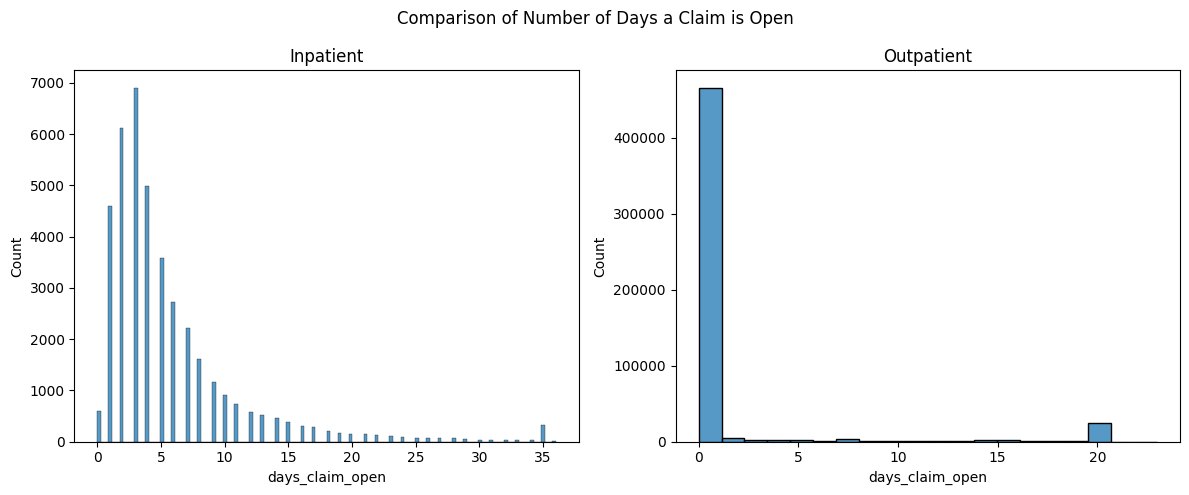

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient_df['days_claim_open'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient_df['days_claim_open'], ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Comparison of Number of Days a Claim is Open')
plt.tight_layout() 
plt.show()

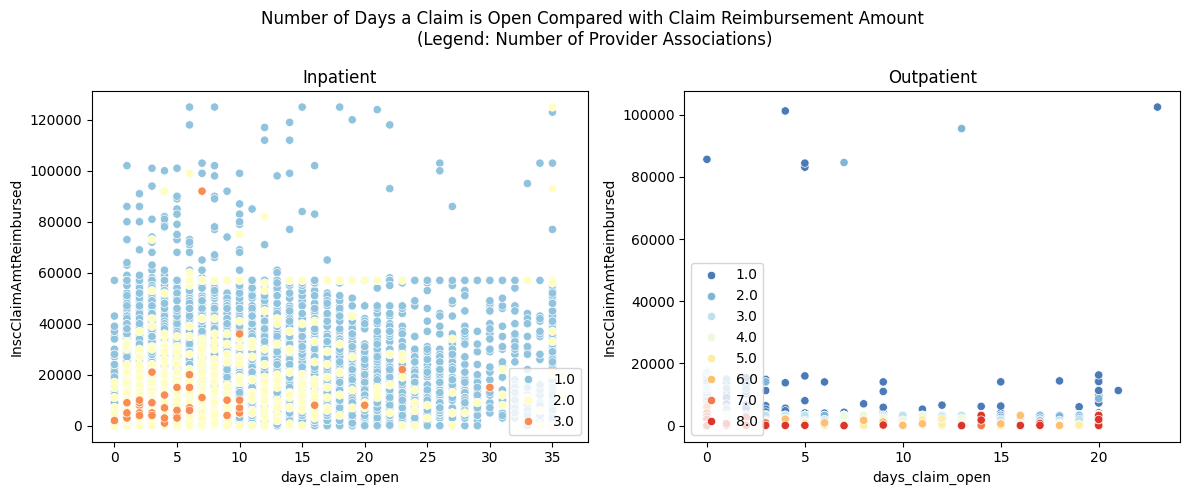

In [217]:
inpatient_df['num_provider_associations'] = inpatient_df['num_provider_associations'].astype('category')
outpatient_df['num_provider_associations'] = outpatient_df['num_provider_associations'].astype('category')

# Sort so higher values are plotted last (on top)
inpatient_df_sorted = inpatient_df.sort_values('num_provider_associations')
outpatient_df_sorted = outpatient_df.sort_values('num_provider_associations')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='days_claim_open', 
                y='InscClaimAmtReimbursed',
                hue='num_provider_associations',
                palette='RdYlBu_r',  # Discrete color palette
                hue_order=[1.0, 2.0, 3.0],
                data=inpatient_df_sorted, 
                ax=axes[0])
axes[0].set_title('Inpatient')
axes[0].legend(loc='lower right')

sns.scatterplot(x='days_claim_open', 
                y='InscClaimAmtReimbursed', 
                hue='num_provider_associations',
                palette='RdYlBu_r',  # Discrete color palette
                hue_order=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
                data=outpatient_df_sorted, 
                ax=axes[1])
axes[1].set_title('Outpatient')
axes[1].legend(loc='lower left')

plt.suptitle('Number of Days a Claim is Open Compared with Claim Reimbursement Amount \n(Legend: Number of Provider Associations)')
plt.tight_layout() 
plt.show()

In [106]:
outpatient_df['num_provider_associations'].value_counts()

num_provider_associations
1.0    452625
2.0     52999
3.0      6516
4.0      2313
5.0      1080
6.0       581
8.0       159
7.0        68
Name: count, dtype: int64

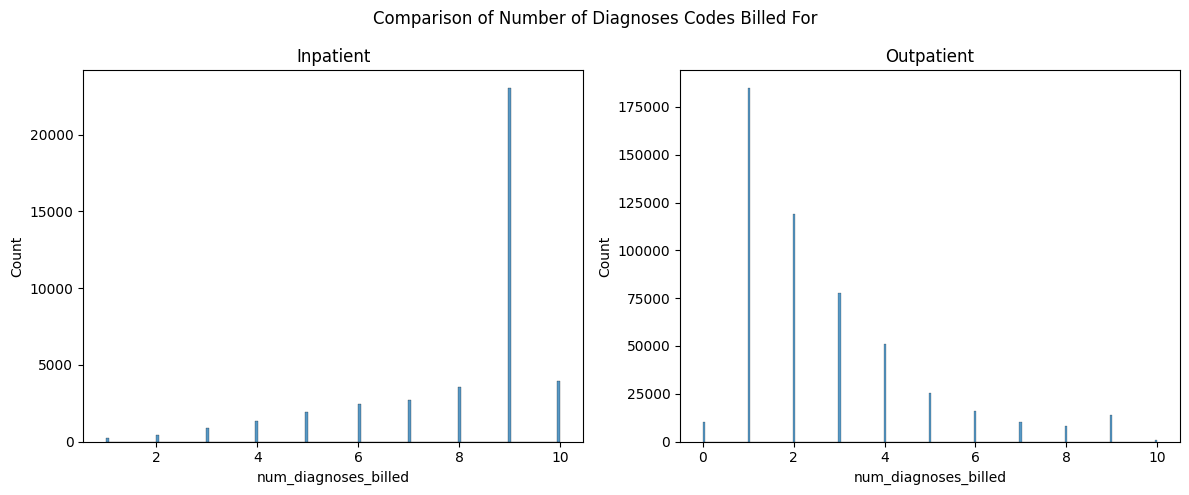

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient_df['num_diagnoses_billed'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient_df['num_diagnoses_billed'], ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Comparison of Number of Diagnoses Codes Billed For')
plt.tight_layout() 
plt.show()

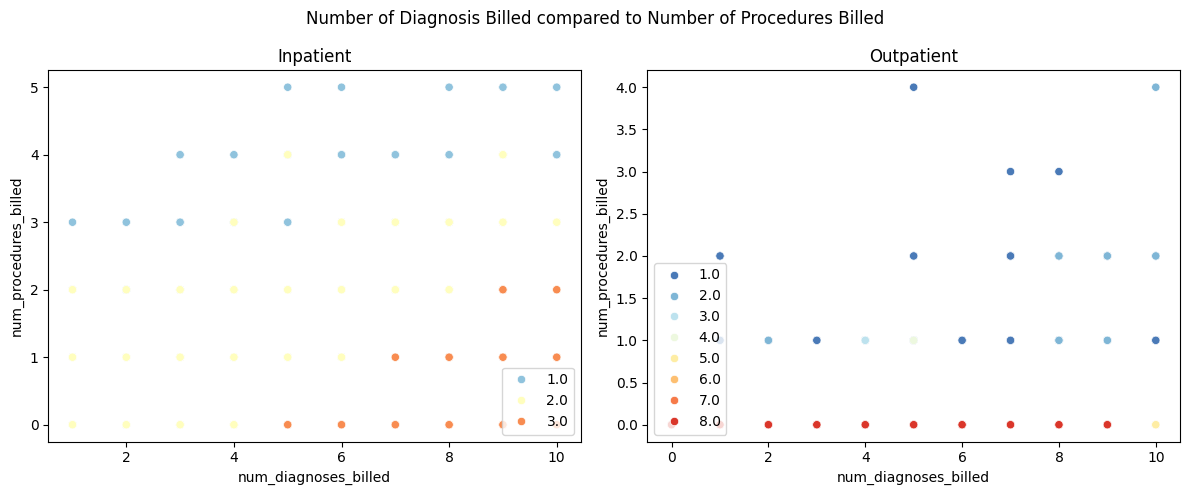

In [108]:
inpatient_df['num_provider_associations'] = inpatient_df['num_provider_associations'].astype('category')
outpatient_df['num_provider_associations'] = outpatient_df['num_provider_associations'].astype('category')

# Sort so higher values are plotted last (on top)
inpatient_df_sorted = inpatient_df.sort_values('num_provider_associations')
outpatient_df_sorted = outpatient_df.sort_values('num_provider_associations')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='num_diagnoses_billed', 
                y='num_procedures_billed',
                hue='num_provider_associations',
                palette='RdYlBu_r',  # Discrete color palette
                hue_order=[1.0, 2.0, 3.0],
                data=inpatient_df_sorted, 
                ax=axes[0])
axes[0].set_title('Inpatient')
axes[0].legend(loc='lower right')

sns.scatterplot(x='num_diagnoses_billed', 
                y='num_procedures_billed', 
                hue='num_provider_associations',
                palette='RdYlBu_r',  # Discrete color palette
                hue_order=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
                data=outpatient_df_sorted, 
                ax=axes[1])
axes[1].set_title('Outpatient')
axes[1].legend(loc='lower left')

plt.suptitle('Number of Diagnosis Billed compared to Number of Procedures Billed')
plt.tight_layout() 
plt.show()

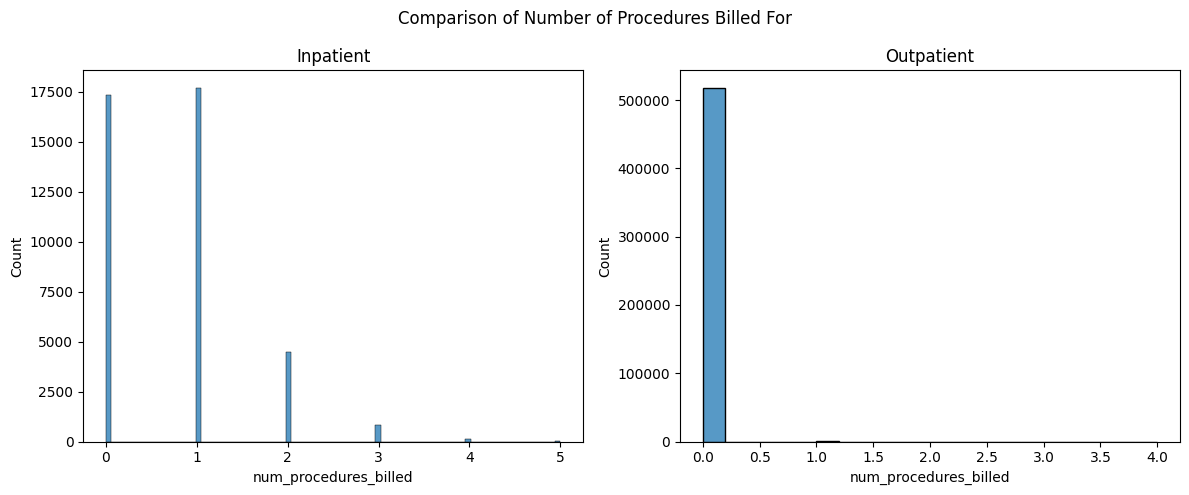

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient_df['num_procedures_billed'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient_df['num_procedures_billed'], ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Comparison of Number of Procedures Billed For')
plt.tight_layout() 
plt.show()

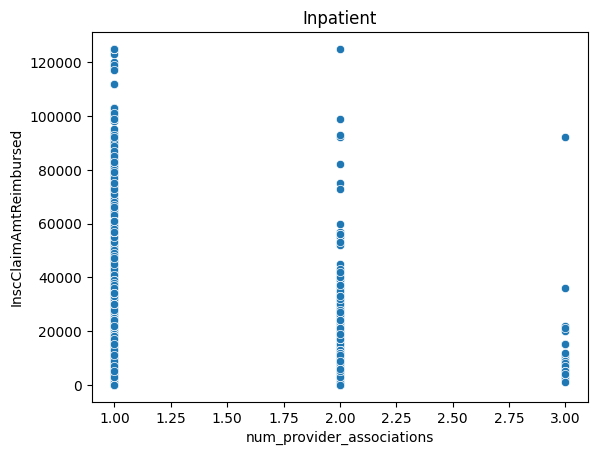

In [110]:
#sns.scatterplot(x='num_provider_associations', y='days_claim_open', data=inpatient_df)
#sns.scatterplot(x='num_provider_associations', y='num_diagnoses_billed', data=inpatient_df)
#sns.scatterplot(x='num_provider_associations', y='num_procedures_billed', data=inpatient_df)
sns.scatterplot(x='num_provider_associations', y='InscClaimAmtReimbursed', data=inpatient_df)

plt.title('Inpatient')
plt.show()

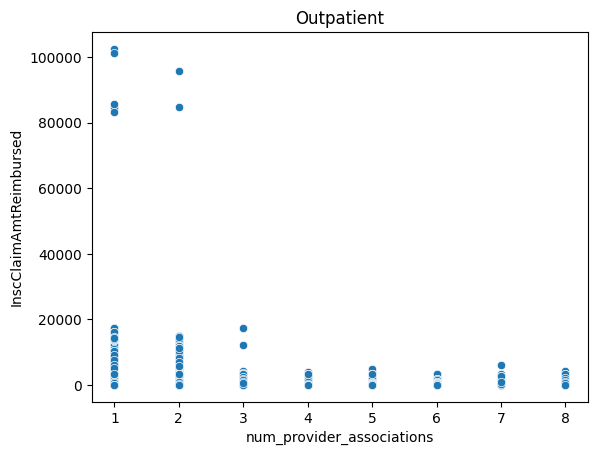

In [111]:
#sns.scatterplot(x='num_provider_associations', y='days_claim_open', data=outpatient_df)
#sns.scatterplot(x='num_provider_associations', y='num_diagnoses_billed', data=outpatient_df)
#sns.scatterplot(x='num_provider_associations', y='num_procedures_billed', data=outpatient_df)
sns.scatterplot(x='num_provider_associations', y='InscClaimAmtReimbursed', data=outpatient_df)

plt.title('Outpatient')
plt.show()

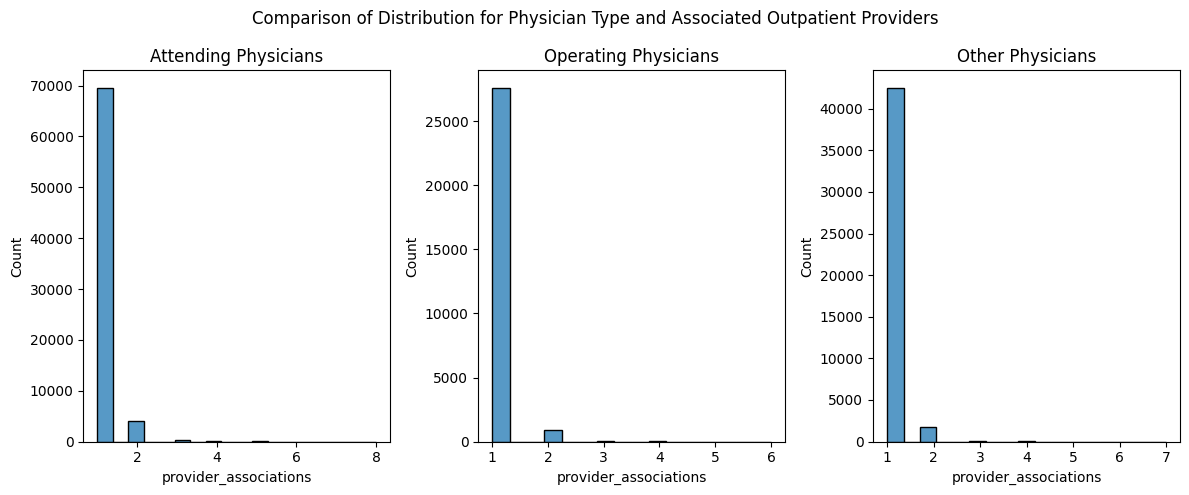

In [237]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.histplot(attending_provider_counts_o['provider_associations'], ax=axes[0])
axes[0].set_title('Attending Physicians')
# axes[0].set_yscale('log')

sns.histplot(operating_provider_counts_o['provider_associations'], ax=axes[1])
axes[1].set_title('Operating Physicians')
# axes[1].set_yscale('log')

sns.histplot(other_provider_counts_o['provider_associations'], ax=axes[2])
axes[2].set_title('Other Physicians')
# axes[2].set_yscale('log')

plt.suptitle('Comparison of Distribution for Physician Type and Associated Outpatient Providers')
plt.tight_layout() 
plt.show()

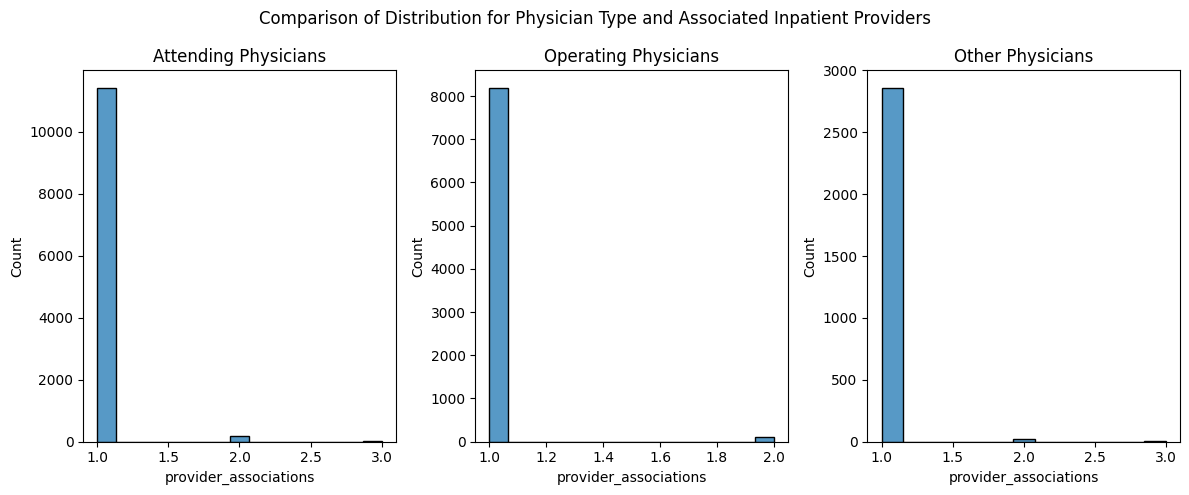

In [239]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.histplot(attending_provider_counts_i['provider_associations'], ax=axes[0])
axes[0].set_title('Attending Physicians')
# axes[0].set_yscale('log')

sns.histplot(operating_provider_counts_i['provider_associations'], ax=axes[1])
axes[1].set_title('Operating Physicians')
# axes[1].set_yscale('log')

sns.histplot(other_provider_counts_i['provider_associations'], ax=axes[2])
axes[2].set_title('Other Physicians')
# axes[2].set_yscale('log')

plt.suptitle('Comparison of Distribution for Physician Type and Associated Inpatient Providers')
plt.tight_layout() 
plt.show()